# "Signal Processing with Julia Language- Part 5"
> "Sinusoidal Signals"
- toc: true
- badges: true
- comments: true
- categories: [jupyter, SignalProcessing]

# Sinusoidal Sequence

### Defined as:


$$x(n) = sin(ω.n + φ), \forall n  \in \mathbb{ N}$$



In [1]:
#collapse-show
# Load dependencies

using MySignalProcessing
using Plots

In [2]:
# plot sinusoidal signal
# with 100 samples every 2 full 2pi cycles
s = 1.0 * sinseq(0,100, 0.125);

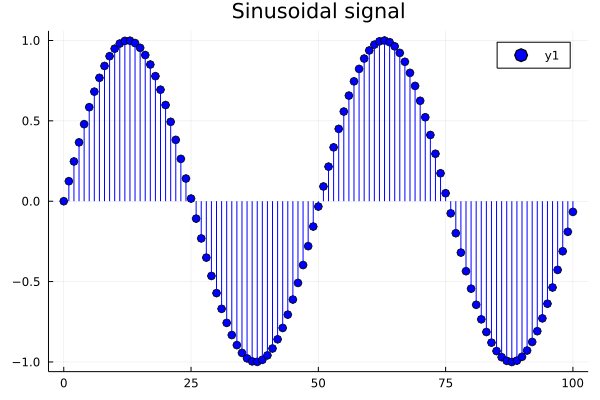

In [3]:
plot(s.n, s.A, line=:stem, title="Sinusoidal signal", marker = :o, color = :blue)

> The same thing can be accomplished with the canonic form constructor:

$$x[n]=sin(\frac{M}{N} 2\pi n)$$

In [7]:
# M = 2
#N = 100 
s = 1.0 * sinseqmn(0,100, 2, 100);

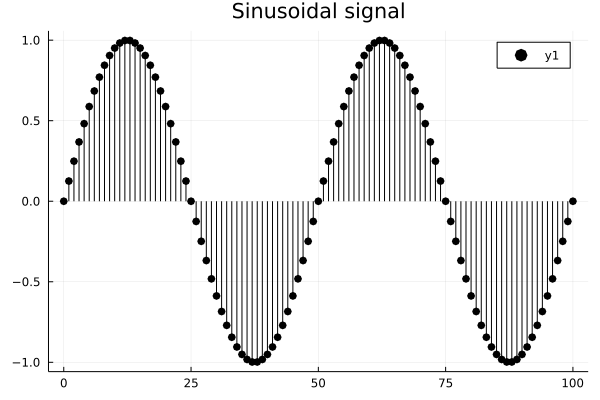

In [10]:
plot(s.n, s.A, line=:stem, title="Sinusoidal signal", marker = :o, color = :black)